In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data=np.loadtxt('data.txt')

In [28]:
data[0]

array([2.21024164e+09, 5.54706100e+00, 5.25627600e+00, 2.43049560e+01,
       2.44011310e+01])

In [37]:


def threeParamSpinUp(t, P_0, P_inf, g_sc):
    return ((P_0 - P_inf)*np.exp(-1.0*g_sc*t) + P_inf)

def Fit(test,time):
    timeFit=np.linspace(time[0],time[len(time)-1],len(time)*200)
    init_vals = [test[0], test[ len(test)-1 ], 3.0] # [P_0, P_inf, g_sc]
    best_vals, covar = curve_fit(threeParamSpinUp, time, test, p0=init_vals)
    yFit = threeParamSpinUp(time, best_vals[0], best_vals[1], best_vals[2])
    yFitLine = threeParamSpinUp(timeFit, best_vals[0], best_vals[1], best_vals[2])
    P_0 = str(np.round(best_vals[0], 3)) + " +/- " + str(np.round(np.sqrt(abs(covar[0][0])), 3)) 
    P_inf = str(np.round(best_vals[1], 3)) + " +/- " + str(np.round(np.sqrt(abs(covar[1][1])), 3)) 
    T_sc = str(np.round(1.0/best_vals[2], 3)) + " +/- " + str(np.round(np.sqrt(abs(covar[2][2]))/( best_vals[2]*best_vals[2],3)) ) 
    print("P_0 = ", P_0, '\n', "P_inf = ", P_inf, '\n',"T_sc = ", T_sc)
    return P_0,P_inf,T_sc,yFitLine,timeFit,time,test

def MakeTime(data):
    #print(data)
    zeroYear=int(str(data[0][0])[:2])
    zeroMonth=int(str(data[0][0])[2:4])
    zeroDay=int(str(data[0][0])[4:6])
    zeroHour=int(str(data[0][0])[6:8])
    zeroMinute=int(str(data[0][0])[8:10])
    relArray=np.empty(0)
    for i in range(0,len(data)):
        #print(i)
        year=int(str(data[i][0])[:2])
        month=int(str(data[i][0])[2:4])
        day=int(str(data[i][0])[4:6])
        hour=int(str(data[i][0])[6:8])
        minute=int(str(data[i][0])[8:10])
        if (month-zeroMonth)%2 == 0:
            relArray= np.append([relArray],(year-zeroYear)*24*365.2422+(month-zeroMonth)*30.5*24+(day-zeroDay)*24+hour-zeroHour+(minute-zeroMinute)/60)
        elif (month-zeroMonth)%2 != 0:
            relArray= np.append([relArray],(year-zeroYear)*24*365.2422+((month-zeroMonth)*30.5+.5)*24+(day-zeroDay)*24+hour-zeroHour+(minute-zeroMinute)/60)

    return (relArray,int(str(data[0][0])[:10]))   

def MakeData(data):
    pcup=np.empty(0)
    pcdown=np.empty(0)
    tcup=np.empty(0)
    tcdown=np.empty(0)
    for i in range(0,len(data)):
        pcup=np.append([pcup],data[i][1])
        pcdown=np.append([pcdown],data[i][2])
        tcup=np.append([tcup],data[i][3])
        tcdown=np.append([tcdown],data[i][4])
    TC=(tcup+tcdown)/2
    PC=(pcup+pcdown)/2
    return(PC,TC,pcup,pcdown,tcup,tcdown)

In [38]:
t=MakeTime(data)
pc=MakeData(data)[0]
tc=MakeData(data)[1]

In [39]:
t

(array([  0.        ,   3.03333333,   5.98333333,   8.66666667,
         11.58333333,  14.88333333,  18.41666667,  24.56666667,
         27.25      ,  29.41666667,  31.66666667,  33.56666667,
         36.16666667,  38.53333333,  41.41666667,  44.78333333,
         47.5       ,  51.08333333,  54.9       ,  60.23333333,
         64.21666667,  69.11666667,  71.38333333,  74.68333333,
         78.48333333,  82.46666667,  85.48333333,  90.03333333,
         93.35      ,  97.6       , 101.33333333, 101.45      ,
        101.76666667, 101.85      , 103.38333333, 103.45      ,
        111.3       , 114.36666667, 117.        , 118.51666667,
        121.2       , 125.05      , 128.8       , 132.85      ,
        136.7       , 140.83333333, 144.58333333, 147.05      ,
        150.33333333, 154.03333333, 157.5       , 164.83333333,
        164.88333333, 166.85      , 166.9       , 167.06666667,
        167.06666667, 167.1       , 167.11666667, 167.13333333,
        167.15      , 167.15      , 167.

(-1.0, 50.0)

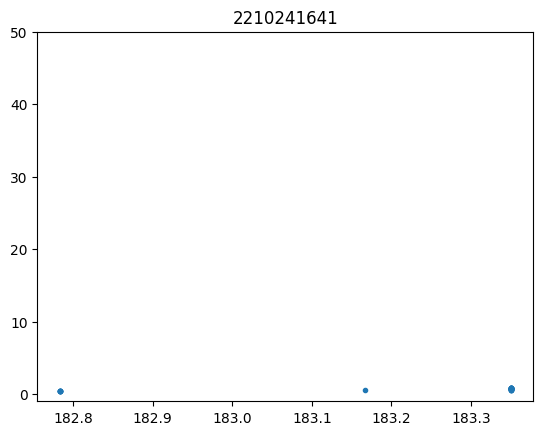

In [44]:
plt.plot(t[0][-30:],tc[-30:], '.')
plt.title(str(t[1]))
plt.ylim(-1,50)
#Fit(pc[-4:],t[0][-4:])